In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.fft
import pandas as pd
import numpy as np
import argparse
import yaml
import random
import matplotlib.pyplot as plt


In [20]:

def check_graph_path(path, dimension, piece=1):

    pred_path = path + '/pred.npy'
    true_path = path + '/true.npy'
    metric_path = path + '/metrics.npy'

    pred = np.load(pred_path)
    true = np.load(true_path)
    metric = np.load(metric_path, allow_pickle=True)    


    pred = pred.squeeze()[:3000]
    true = true.squeeze()[:3000]

    # pred = pred.squeeze()[:1500, dimension]
    # true = true.squeeze()[:1500, dimension]
    
    # pred = pred.squeeze()[:2000, -1 , dimension]
    # true = true.squeeze()[:2000, -1 , dimension]

    l = true.shape[0]
    chunk = l // piece

    fig, axs = plt.subplots(piece, figsize=(20, 4 * piece))
    for i in range(piece):
        L = i * chunk
        R = min(L + chunk, l)
        ymin, ymax = axs[i].get_ylim()
        # ymin = 0
        # axs[i].set_ylim(ymin, ymax)
        
        xticks = np.arange(L, R)
        axs[i].plot(xticks, (true[L:R]), color='teal', label='True')
        axs[i].plot(xticks, (pred[L:R]), color='coral', label='Pred')
        axs[i].legend()
        
    print(f'MAE: {metric[0]}\n\
    MSE: {metric[1]}')    
        
    return fig

## Pred_len = 1

MAE: 2.7240731716156006
    MSE: 17.148651123046875


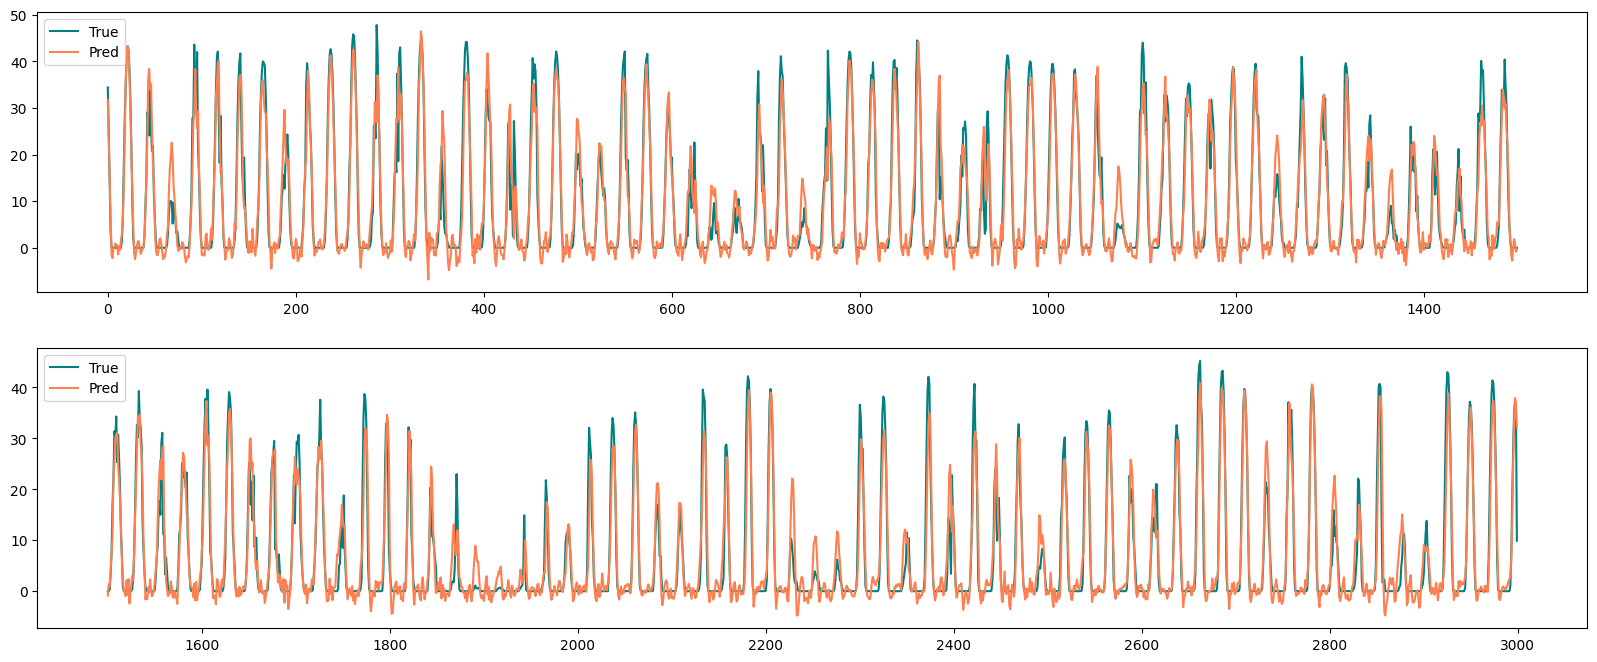

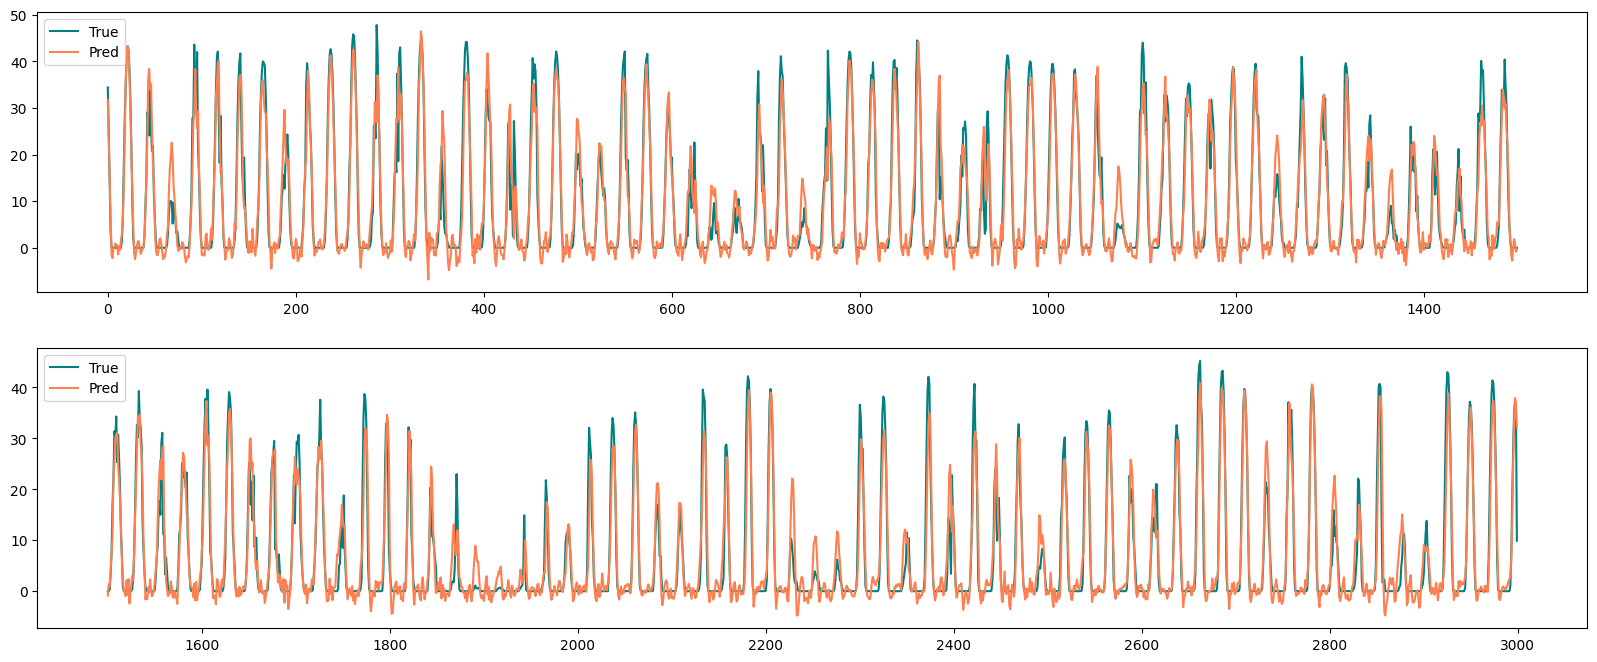

In [21]:
path = '/root/JINU/TSF/results/100_1_total_DLinear_custom_ftMS_sl100_ll0_pl1_scNone_0'

dimension = 6
piece = 2

check_graph_path(path, dimension, piece)

MAE: 1.8910388946533203
    MSE: 11.611174583435059


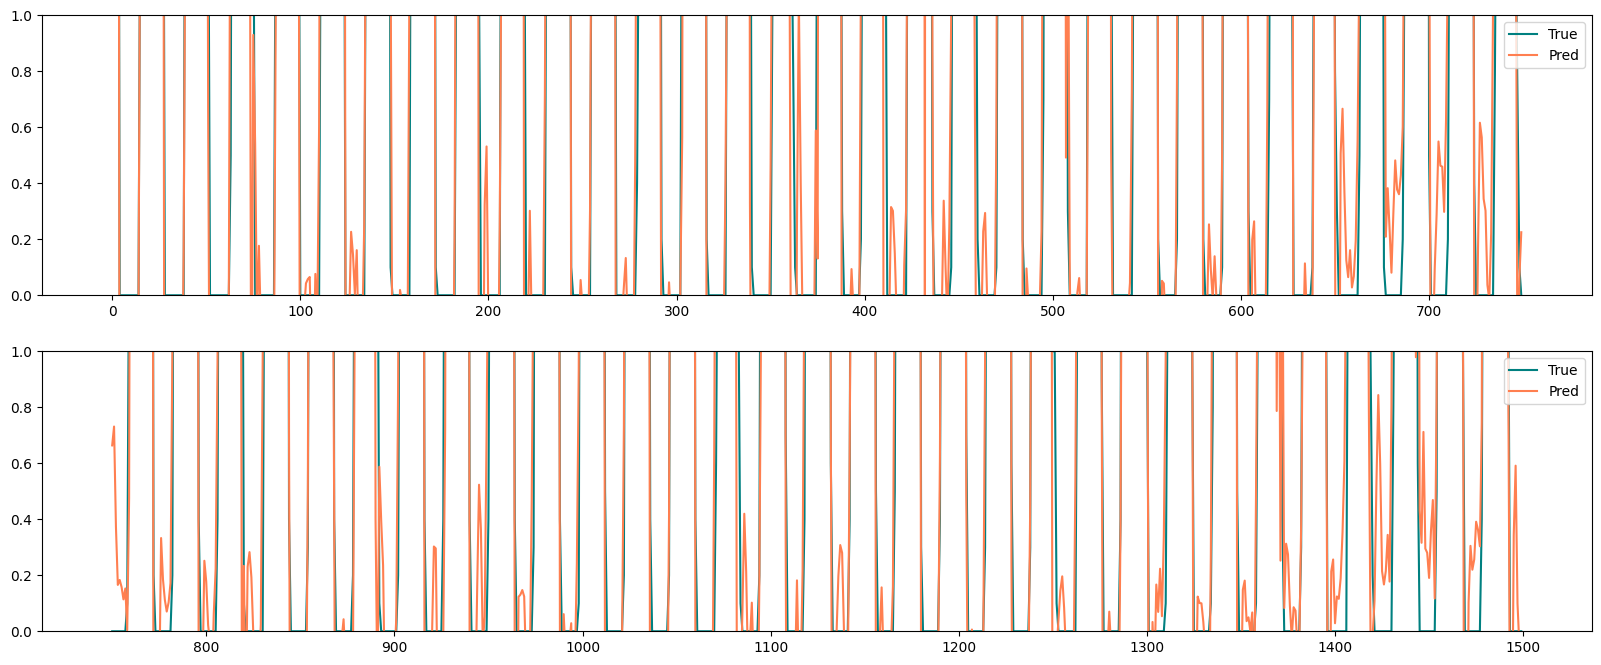

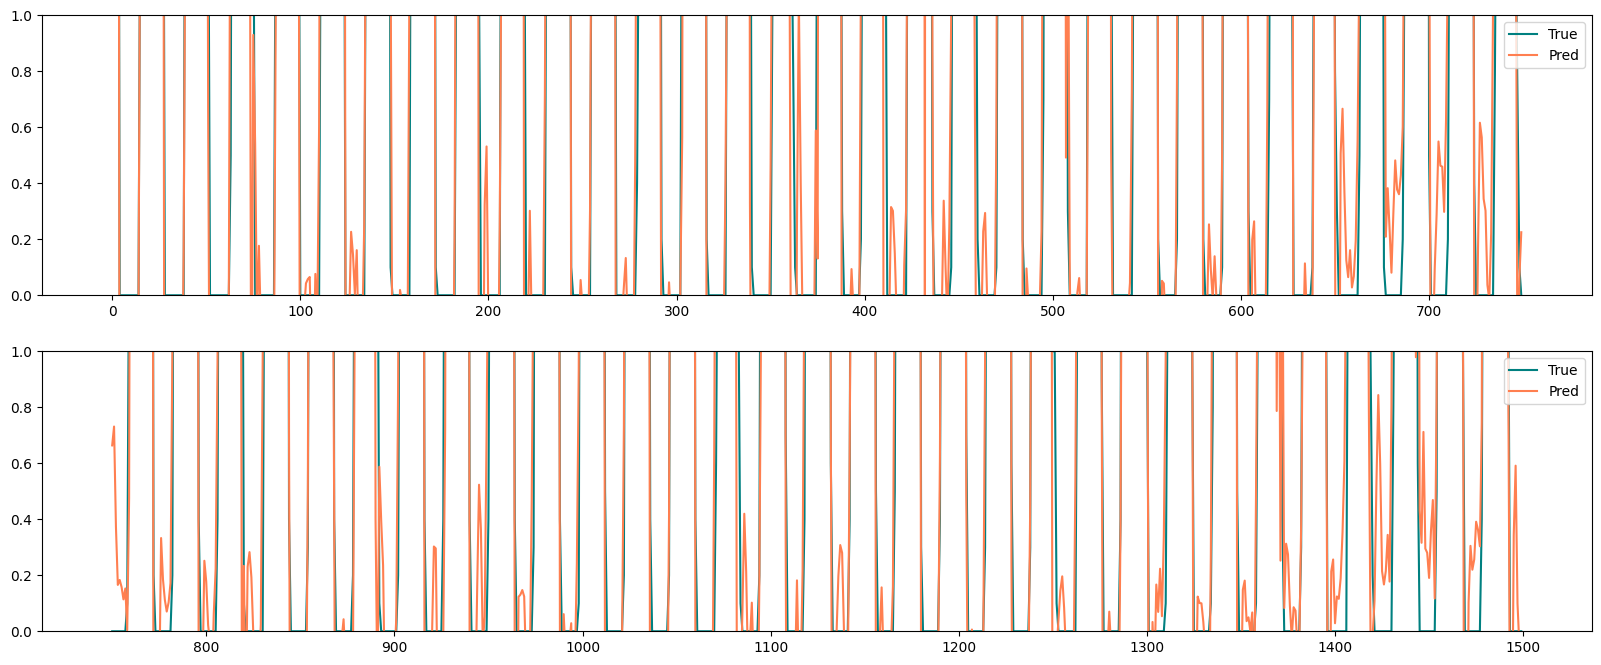

In [38]:
path = '/home/parkjinwoo/JINU/TSF/results/100_1_exp_1_DLinear_custom_ftMS_sl100_ll0_pl1_scNone_0'

pred_path = path + '/pred.npy'
true_path = path + '/true.npy'
metric_path = path + '/metrics.npy'

pred = np.load(pred_path)
true = np.load(true_path)
metric = np.load(metric_path, allow_pickle=True)    

dimension = 6
piece = 2

check_graph_path(path, dimension, piece)